In [81]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [82]:
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Gross-income']

In [83]:
# Import train and test datasets
df = pd.read_csv('adult.data', header = None, names = cols)
test_df = pd.read_csv('adult-Copy1.test', header = None, names = cols)

In [84]:
test_df.iloc[:, -1].replace(to_replace = [' <=50K.', ' >50K.'], value = [' <=50K', ' >50K'], inplace = True)

In [85]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Gross-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
test_df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Gross-income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [87]:
df.shape

(32561, 15)

In [88]:
test_df.shape

(16281, 15)

In [89]:
df.drop_duplicates(inplace = True)
test_df.drop_duplicates(inplace = True)

In [90]:
df.shape

(32537, 15)

In [91]:
test_df.shape

(16276, 15)

In [92]:
new_desc = {'column' : list(df.columns),
            'dtype' : df.dtypes,
            'null' : df.isnull().sum(),
            'null_%' : df.isnull().sum()/df.shape[0],
            'unique' : df.nunique(),
            'unique_%' : df.nunique()/df.shape[0]}

new_desc = pd.DataFrame(new_desc)
print(df.shape[0])

32537


In [93]:
new_desc

,column,dtype,null,null_%,unique,unique_%
Age,Age,int64,0,0.0,73,0.002244
Workclass,Workclass,object,0,0.0,9,0.000277
Fnlwgt,Fnlwgt,int64,0,0.0,21648,0.665335
Education,Education,object,0,0.0,16,0.000492
Education-num,Education-num,int64,0,0.0,16,0.000492
Marital-status,Marital-status,object,0,0.0,7,0.000215
Occupation,Occupation,object,0,0.0,15,0.000461
Relationship,Relationship,object,0,0.0,6,0.000184
Race,Race,object,0,0.0,5,0.000154
Sex,Sex,object,0,0.0,2,0.000061


In [94]:
test_new_desc = {'column' : list(test_df.columns),
                 'dtype' : test_df.dtypes,
                 'null' : test_df.isnull().sum(),
                 'null_%' : test_df.isnull().sum()/test_df.shape[0],
                 'unique' : test_df.nunique(),
                 'unique_%' : test_df.nunique()/test_df.shape[0]}

test_new_desc = pd.DataFrame(test_new_desc)
print(test_df.shape[0])

16276


In [95]:
test_new_desc

,column,dtype,null,null_%,unique,unique_%
Age,Age,int64,0,0.0,73,0.004485
Workclass,Workclass,object,0,0.0,9,0.000553
Fnlwgt,Fnlwgt,int64,0,0.0,12787,0.785635
Education,Education,object,0,0.0,16,0.000983
Education-num,Education-num,int64,0,0.0,16,0.000983
Marital-status,Marital-status,object,0,0.0,7,0.000430
Occupation,Occupation,object,0,0.0,15,0.000922
Relationship,Relationship,object,0,0.0,6,0.000369
Race,Race,object,0,0.0,5,0.000307
Sex,Sex,object,0,0.0,2,0.000123


In [96]:
# Replace ' ?' with np.nan
df.replace(' ?', np.nan, inplace = True)
test_df.replace(' ?', np.nan, inplace = True)

In [97]:
print('df shape : {}'.format(df.shape))
print('test_df shape : {}'.format(test_df.shape))

df shape : (32537, 15)
test_df shape : (16276, 15)


In [98]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     582
Gross-income         0
dtype: int64

In [99]:
test_df.isnull().sum()

Age                 0
Workclass         963
Fnlwgt              0
Education           0
Education-num       0
Marital-status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hours-per-week      0
Native-country    274
Gross-income        0
dtype: int64

In [100]:
# Categorical indexes for train and test data
train_obj_indexes = list(new_desc.loc[new_desc['dtype'] == 'object'].index)
test_obj_indexes = list(test_new_desc.loc[test_new_desc['dtype'] == 'object'].index)

In [101]:
# Numerical indexes for train and test data
train_int_indexes = list(new_desc.loc[~(new_desc['dtype'] == 'object')].index)
test_int_indexes = list(test_new_desc.loc[~(test_new_desc['dtype'] == 'object')].index)

In [102]:
train_obj_indexes

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country',
 'Gross-income']

In [103]:
test_obj_indexes

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country',
 'Gross-income']

In [104]:
train_int_indexes

['Age',
 'Fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

In [105]:
test_int_indexes

['Age',
 'Fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

In [106]:
# Univariate visuals
def uni_plot(df, lst):
    for i in lst:
        plt.figure(figsize = (16, 10))
        sns.distplot(df.loc[:, i], color = 'green')
        plt.show()

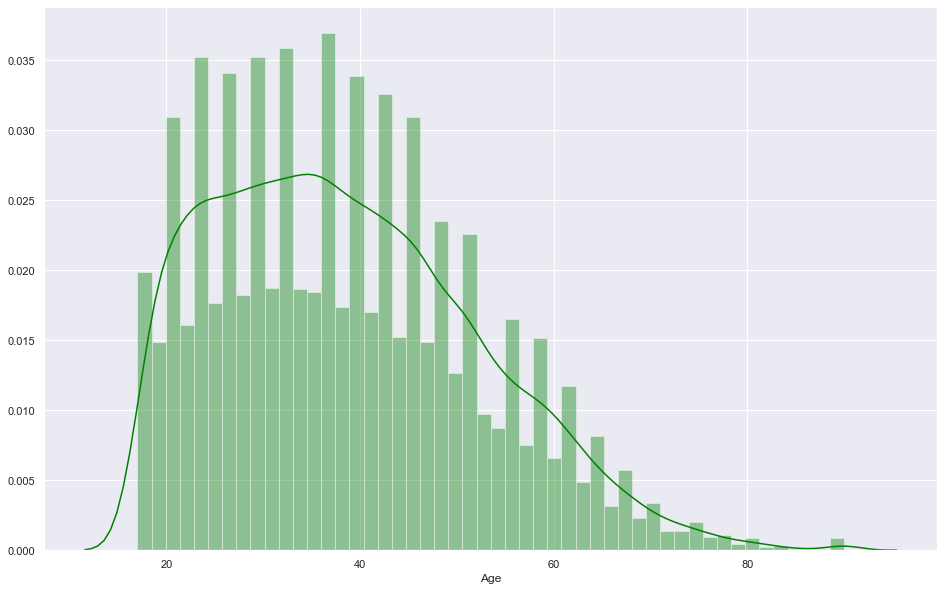

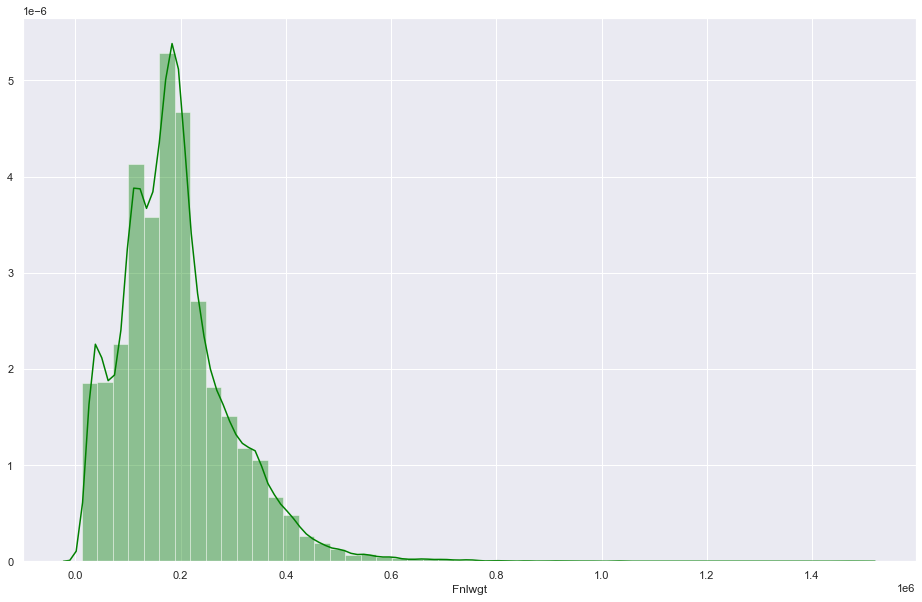

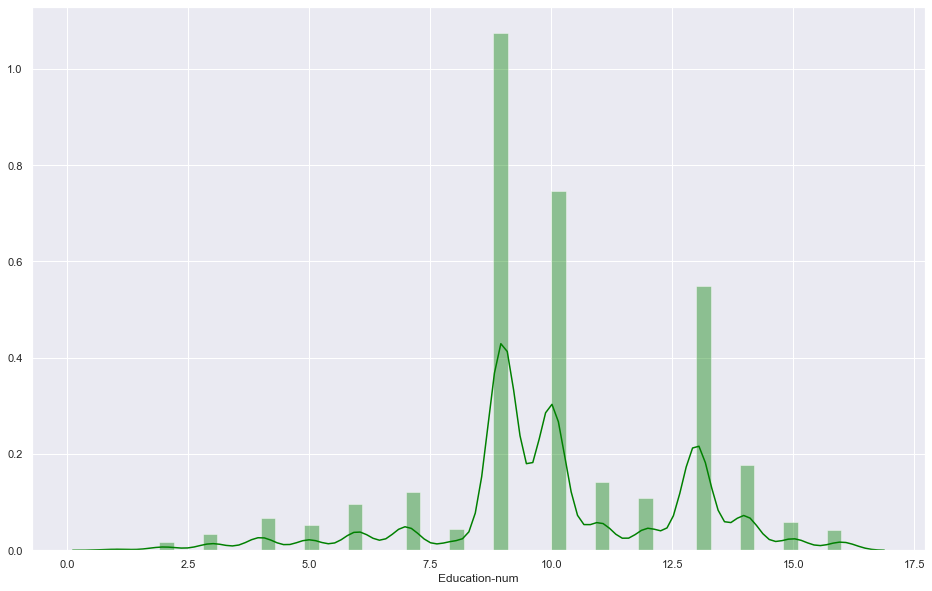

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


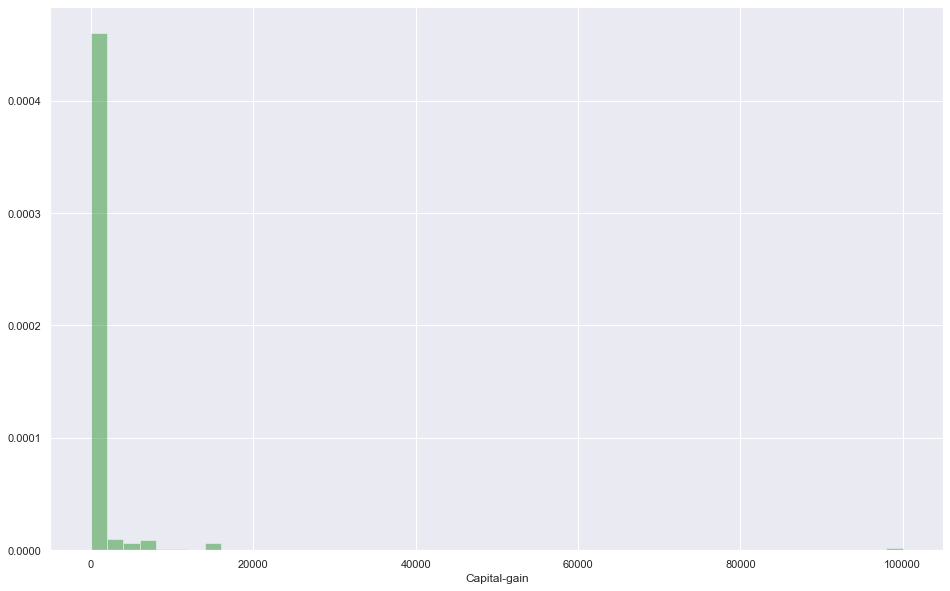

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


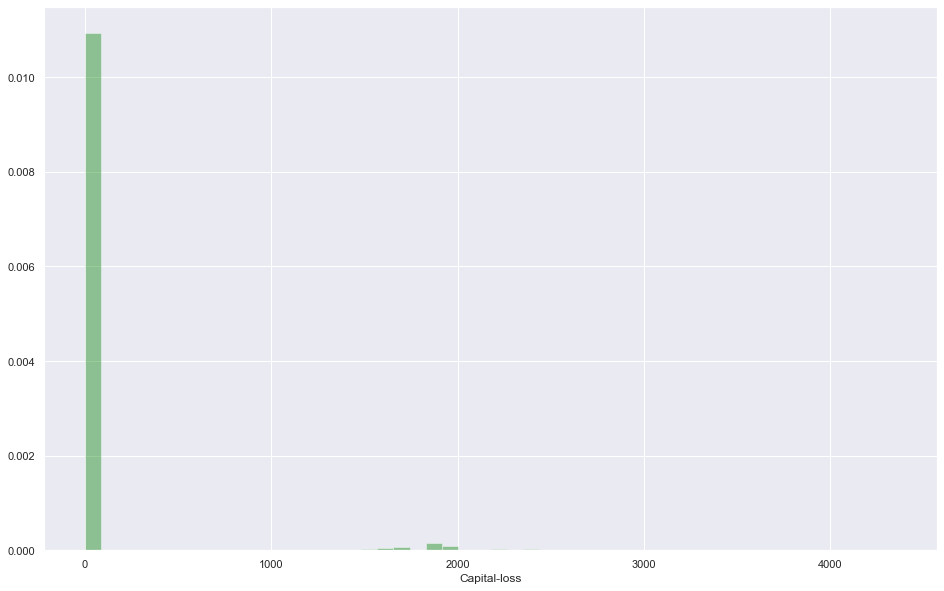

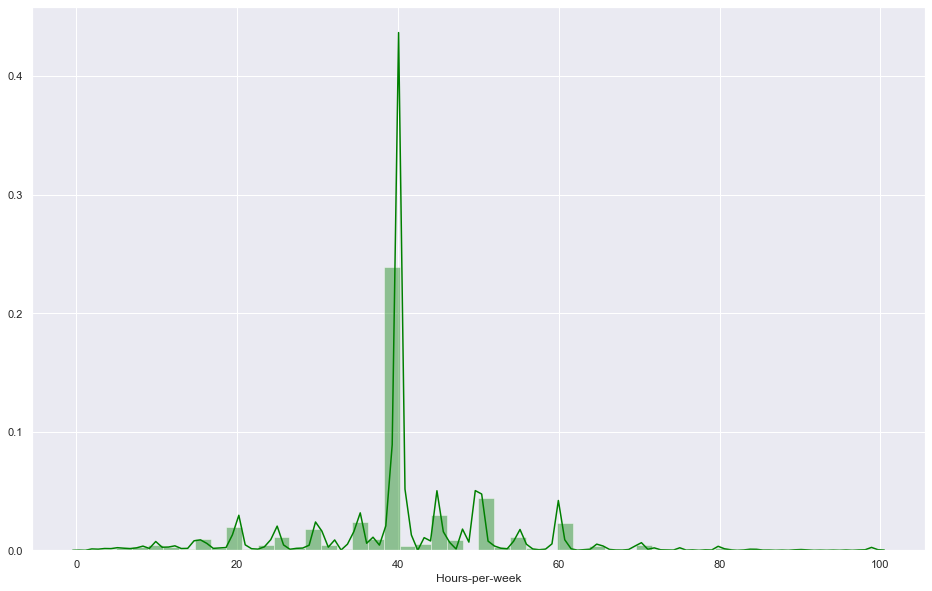

In [107]:
uni_plot(df, train_int_indexes)

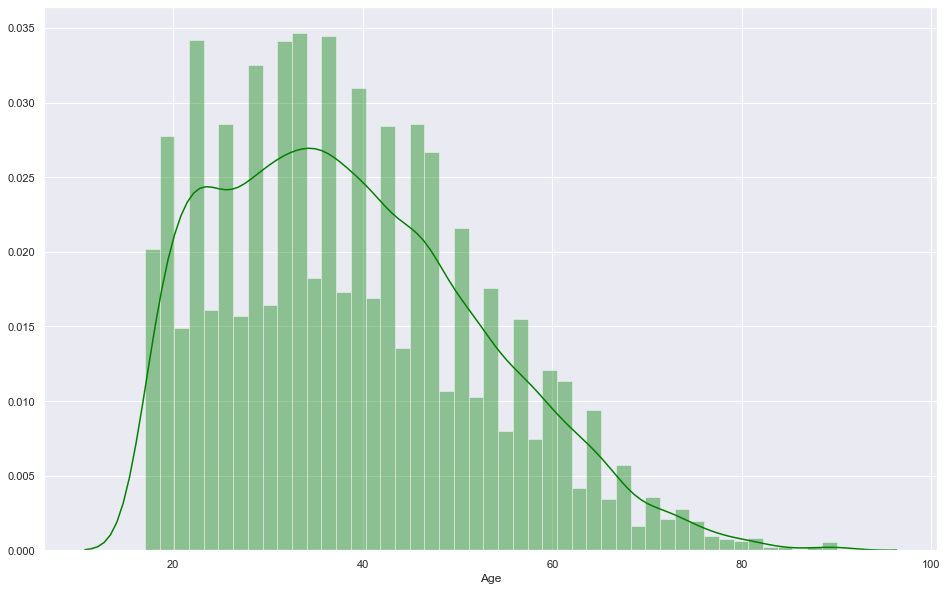

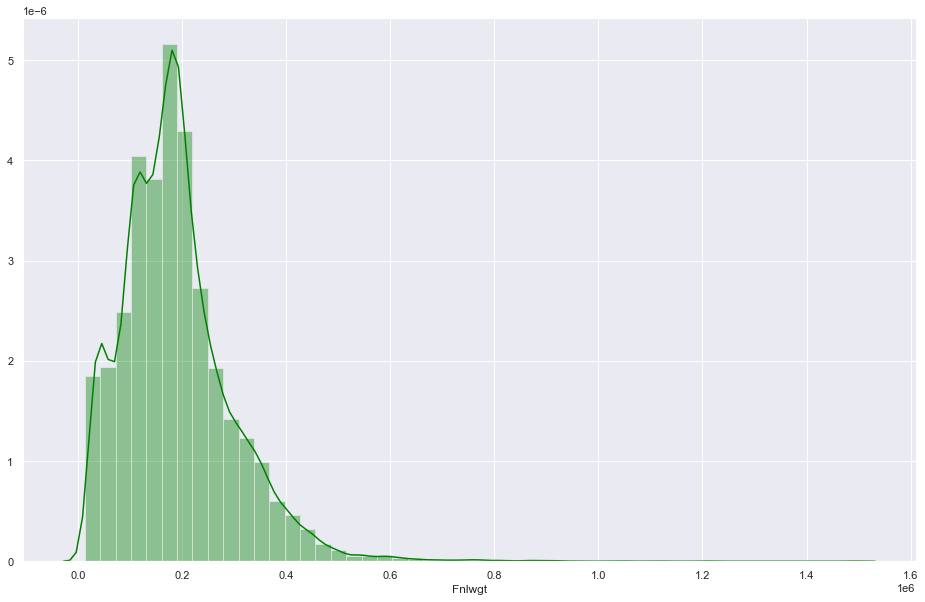

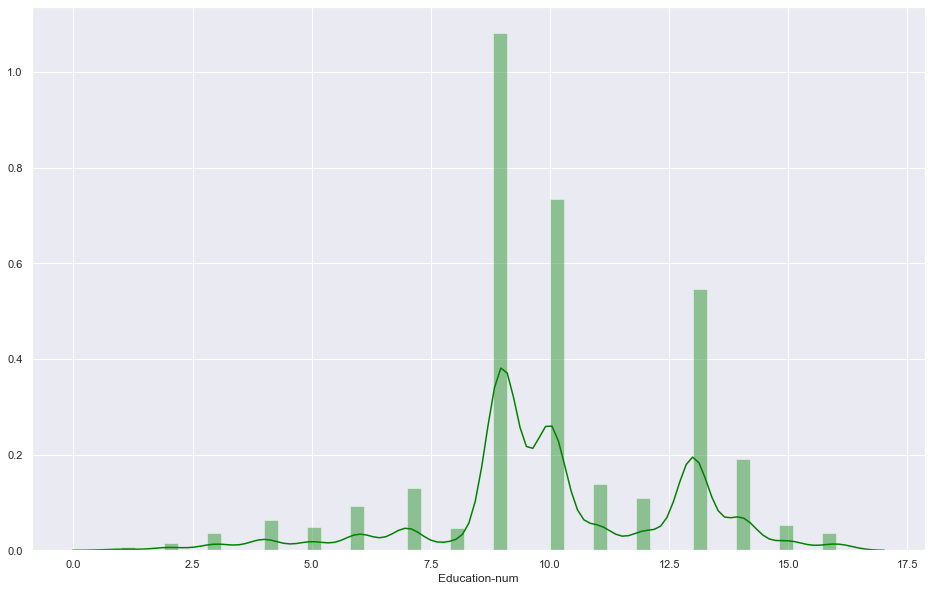

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


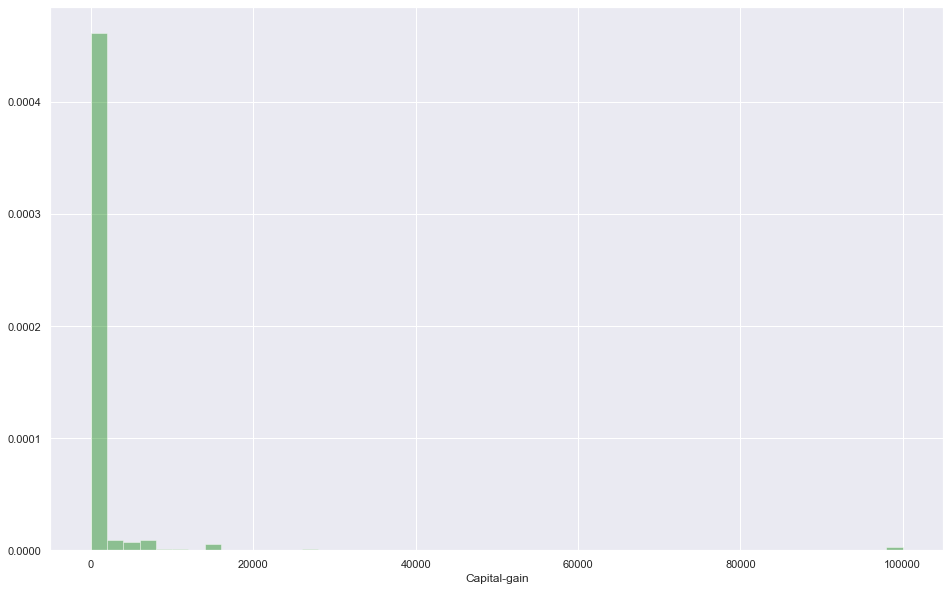

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


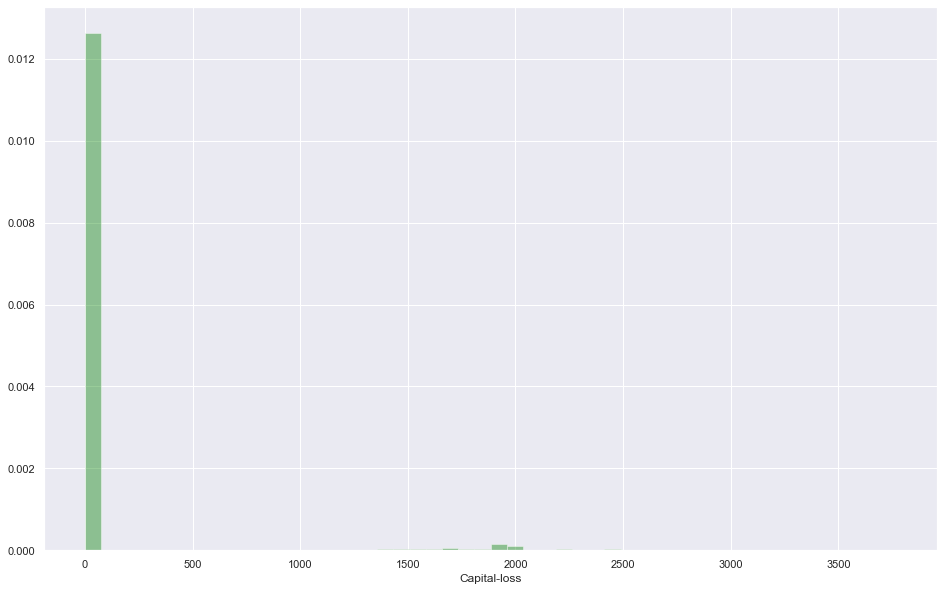

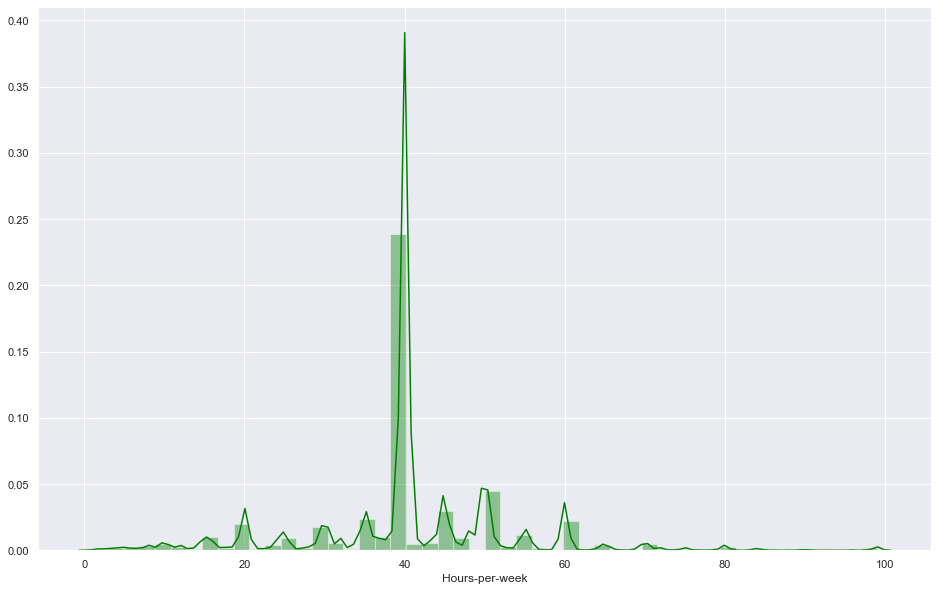

In [108]:
uni_plot(test_df, test_int_indexes)

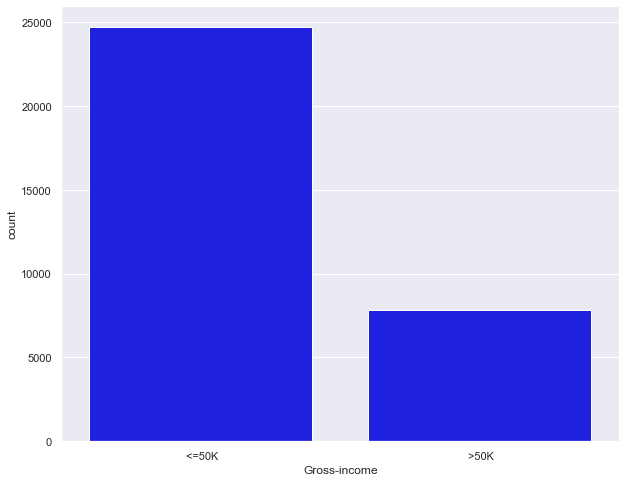

In [109]:
# Count plot for class labels (train data)

plt.figure(figsize = (10, 8))
sns.countplot(x = df.iloc[:, -1], color = 'blue')
plt.show()

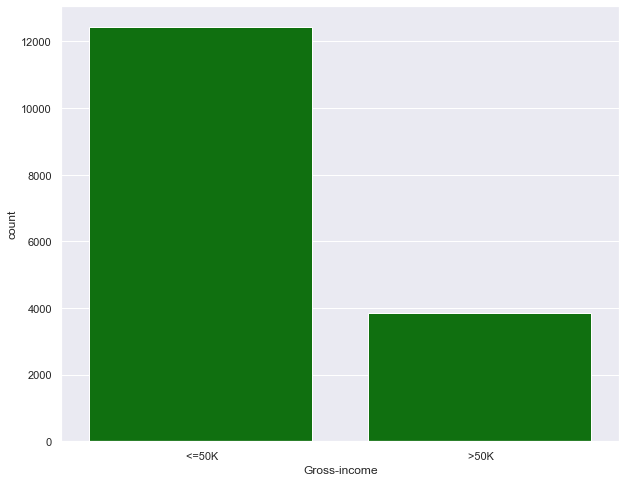

In [110]:
# Count plot for class labels (test data)

plt.figure(figsize = (10, 8))
sns.countplot(x = test_df.iloc[:, -1], color = 'green')
plt.show()

# Fill in missing values
df = df.fillna(method = 'ffill')
test_df = test_df.fillna(method = 'ffill')

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

df = imputer.fit_transform(df)
test_df = imputer.transform(test_df)

In [111]:
total_df = pd.merge(df, test_df, how = 'outer')

In [112]:
total_df.shape

(48790, 15)

In [113]:
total_df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Gross-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [114]:
total_df = total_df.sample(frac = 1)

In [115]:
total_df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Gross-income
38442,31,Private,282173,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
19142,53,Private,149784,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
651,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K
21170,23,NaN,281668,10th,6,Never-married,NaN,Own-child,Black,Female,0,0,40,United-States,<=50K
28822,38,Private,108907,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,NaN,<=50K


In [116]:
total_df = total_df.reset_index(drop = True)

In [117]:
total_df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Gross-income
0,31,Private,282173,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
1,53,Private,149784,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
2,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K
3,23,NaN,281668,10th,6,Never-married,NaN,Own-child,Black,Female,0,0,40,United-States,<=50K
4,38,Private,108907,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,NaN,<=50K


In [118]:
total_df = total_df.fillna(method = 'ffill')

In [119]:
total_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Gross-income      0
dtype: int64

In [120]:
total_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Gross-income      object
dtype: object

In [121]:
print('df shape : {}'.format(df.shape))
print('test_df shape : {}'.format(test_df.shape))

df shape : (32537, 15)
test_df shape : (16276, 15)


In [122]:
df = pd.DataFrame(data = df, columns = cols)
test_df = pd.DataFrame(data = test_df, columns = cols)

In [123]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     582
Gross-income         0
dtype: int64

In [124]:
test_df.isnull().sum()

Age                 0
Workclass         963
Fnlwgt              0
Education           0
Education-num       0
Marital-status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hours-per-week      0
Native-country    274
Gross-income        0
dtype: int64

In [125]:
df.skew()

Age                0.557663
Fnlwgt             1.447703
Education-num     -0.309500
Capital-gain      11.949403
Capital-loss       4.592702
Hours-per-week     0.228759
dtype: float64

In [126]:
test_df.skew()

Age                0.554290
Fnlwgt             1.423435
Education-num     -0.326124
Capital-gain      11.776464
Capital-loss       4.519854
Hours-per-week     0.260873
dtype: float64

In [127]:
total_df.skew()

Age                0.556582
Fnlwgt             1.439698
Education-num     -0.314229
Capital-gain      11.888265
Capital-loss       4.567037
Hours-per-week     0.239652
dtype: float64

In [128]:
total_df.shape

(48790, 15)

# Split data

y = df.iloc[:, -1]
X = df.iloc[:, :-1]

y_test = test_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]

In [129]:
X = total_df.iloc[:, :-1]
y = total_df.iloc[:, -1]

In [130]:
# Encode categorical features

def cat_encode(X, obj_indexes):
    for column in [column for column in obj_indexes if column not in ('Gross-income')]:
        from sklearn.preprocessing import LabelEncoder
        enc = LabelEncoder()
        
        X.loc[:, column] = enc.fit_transform(X.loc[:, column])
        #X_test.loc[:, column] = enc.transform(X_test.loc[:, column])
        
    return X

In [131]:
X = cat_encode(X, train_obj_indexes)

In [132]:
X.head() 

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,31,3,282173,15,10,2,2,0,4,1,0,0,40,25
1,53,3,149784,11,9,2,6,0,4,1,0,0,40,38
2,24,3,556660,11,9,4,3,2,4,1,4101,0,50,38
3,23,3,281668,0,6,4,3,3,2,0,0,0,40,38
4,38,3,108907,11,9,0,2,1,4,1,0,0,40,38


In [133]:
from lightgbm import LGBMClassifier

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold

In [134]:
# Transform labels
le = LabelEncoder()

y = le.fit_transform(y)
#y_test = le.transform(y_test)

In [135]:
from catboost import CatBoostClassifier

In [136]:
power = PowerTransformer(method = 'yeo-johnson')
lgbm = LGBMClassifier(random_state = 123, class_weight = 'balanced')
cat_boost = CatBoostClassifier(iterations = 1000, eta = 0.01)

lgbm_pipe = Pipeline(steps = [('power', power),
                              ('cat', cat_boost)])

In [137]:
# Cross validation

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats  = 3)

scores = cross_val_score(estimator = lgbm_pipe, X = X, y = y, cv = cv, n_jobs = -1,
                         scoring = 'roc_auc')

In [138]:
scores

array([       nan,        nan, 0.91382559,        nan, 0.92418031,
       0.92719165, 0.91438091, 0.92268347, 0.91641704, 0.91816721,
       0.91998854, 0.91744704, 0.91536535, 0.92553873, 0.92140545,
       0.91862032, 0.91703119, 0.92321444, 0.91662364, 0.92011487,
       0.91812752, 0.92108199, 0.92494477, 0.92232437, 0.91771893,
       0.91907632, 0.91133485, 0.91841972, 0.92492354, 0.91778365])

In [139]:
#print('Train score is :', ' ', np.mean(scores['train_score']))
print('Test score is :', ' ', np.mean(scores))

Test score is :   nan


In [140]:
def class_report(scores):
    pp('Classification report on model:')
    pp('********************************')
    pp('********************************')
    pp('Training scores:')
    pp('********************************')
    pp('Mean Roc_auc score: {}'.format(np.mean(scores['train_roc_auc'])))
    pp('Mean Accuracy score: {}'.format(np.mean(scores['train_accuracy'])))
    pp('Mean Recall score: {}'.format(np.mean(scores['train_recall_macro'])))
    pp('Mean Precision score: {}'.format(np.mean(scores['train_precision_macro'])))
    pp('Mean F1 score: {}'.format(np.mean(scores['train_f1_macro'])))
    pp('********************************')
    pp('Testing scores:')
    pp('********************************')
    pp('Mean Roc_auc score: {}'.format(np.mean(scores['test_roc_auc'])))
    pp('Mean Accuracy score: {}'.format(np.mean(scores['test_accuracy'])))
    pp('Mean Recall score: {}'.format(np.mean(scores['test_recall_macro'])))
    pp('Mean Precision score: {}'.format(np.mean(scores['test_precision_macro'])))
    pp('Mean F1 score: {}'.format(np.mean(scores['test_f1_macro'])))

In [141]:
class_report(scores)

NameError: name 'pp' is not defined

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'lgbm__max_depth' : [3, 4, 5, 6],
              'lgbm__num_leaves' : [20, 30, 40],
              'lgbm__n_estimators' : [100, 200, 300],
              'power__standardize' : [True, False]}

lgbm_grid = GridSearchCV(estimator = lgbm_pipe, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = cv)
lgbm_grid.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             estimator=Pipeline(steps=[('power', PowerTransformer()),
                                       ('lgbm',
                                        LGBMClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'lgbm__max_depth': [3, 4, 5, 6],
                         'lgbm__n_estimators': [100, 200, 300],
                         'lgbm__num_leaves': [20, 30, 40],
                         'power__standardize': [True, False]},
             scoring='roc_auc')

In [43]:
lgbm_grid.best_score_

0.929243740189529

In [44]:
lgbm_grid.best_estimator_

Pipeline(steps=[('power', PowerTransformer(standardize=False)),
                ('lgbm',
                 LGBMClassifier(max_depth=4, n_estimators=300, num_leaves=20,
                                random_state=123))])

In [45]:
lgbm_grid.best_params_

{'lgbm__max_depth': 4,
 'lgbm__n_estimators': 300,
 'lgbm__num_leaves': 20,
 'power__standardize': False}

<h4> Let's try out the LGBM classifier without using the PowerTransformer.

In [46]:
lgbm_model = LGBMClassifier(random_state = 123, class_weight = 'balanced')
lgbm_model_scores = cross_validate(estimator = lgbm_model, cv = cv, n_jobs = -1, X = X, y = y, scoring = ['roc_auc', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], return_train_score = True)

In [47]:
class_report(lgbm_model_scores)

'Classification report on model:'
'********************************'
'********************************'
'Training scores:'
'********************************'
'Mean Roc_auc score: 0.9464530828672418'
'Mean Accuracy score: 0.8880858373845918'


KeyError: 'train_recall_macro'

In [48]:
lgbm_model = LGBMClassifier(random_state = 123, max_depth = 5, class_weight = 'balanced')

In [49]:
lgbm_param_grid = {'learning_rate' : [0.001, 0.005, 0.009],
                   'n_estimators' : [1000, 1200, 1700]
                  }

In [50]:
lgbm_lone_grid = GridSearchCV(estimator = lgbm_model, param_grid = lgbm_param_grid, scoring = 'roc_auc', n_jobs = -1, cv = cv)
lgbm_lone_grid.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             estimator=LGBMClassifier(max_depth=5, random_state=123), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.009],
                         'n_estimators': [1000, 1200, 1700]},
             scoring='roc_auc')

In [51]:
lgbm_lone_grid.best_score_

0.9289471736597777

lgbm = LGBMClassifier(random_state = 123, n_estimators = 300, num_leaves = 31, max_depth = 4, class_weight = 'balanced')
#lgbm = LGBMClassifier(random_state = 123)
power = PowerTransformer(method = 'yeo-johnson')

lgbm_pipe = Pipeline(steps = [('power', power),
                              ('lgbm', lgbm)])

In [142]:
from sklearn.metrics import roc_auc_score

In [143]:
from sklearn.metrics import classification_report

In [144]:
lgbm_pipe.fit(X, y)
#yhat = lgbm_pipe.predict(X_test)

0:	learn: 0.6821694	total: 200ms	remaining: 3m 20s
1:	learn: 0.6725901	total: 243ms	remaining: 2m 1s
2:	learn: 0.6627007	total: 289ms	remaining: 1m 35s
3:	learn: 0.6534065	total: 323ms	remaining: 1m 20s
4:	learn: 0.6443060	total: 356ms	remaining: 1m 10s
5:	learn: 0.6346620	total: 388ms	remaining: 1m 4s
6:	learn: 0.6264400	total: 428ms	remaining: 1m
7:	learn: 0.6177233	total: 467ms	remaining: 57.9s
8:	learn: 0.6093450	total: 500ms	remaining: 55s
9:	learn: 0.6016321	total: 533ms	remaining: 52.7s
10:	learn: 0.5941970	total: 564ms	remaining: 50.7s
11:	learn: 0.5867721	total: 610ms	remaining: 50.2s
12:	learn: 0.5798152	total: 644ms	remaining: 48.9s
13:	learn: 0.5725821	total: 678ms	remaining: 47.7s
14:	learn: 0.5652683	total: 711ms	remaining: 46.7s
15:	learn: 0.5588749	total: 745ms	remaining: 45.8s
16:	learn: 0.5525184	total: 792ms	remaining: 45.8s
17:	learn: 0.5456921	total: 825ms	remaining: 45s
18:	learn: 0.5401965	total: 858ms	remaining: 44.3s
19:	learn: 0.5339472	total: 891ms	remaining:

163:	learn: 0.3298563	total: 6.36s	remaining: 32.4s
164:	learn: 0.3296522	total: 6.4s	remaining: 32.4s
165:	learn: 0.3294952	total: 6.46s	remaining: 32.5s
166:	learn: 0.3292764	total: 6.51s	remaining: 32.5s
167:	learn: 0.3290677	total: 6.55s	remaining: 32.5s
168:	learn: 0.3288168	total: 6.59s	remaining: 32.4s
169:	learn: 0.3285414	total: 6.63s	remaining: 32.4s
170:	learn: 0.3283344	total: 6.67s	remaining: 32.3s
171:	learn: 0.3281282	total: 6.71s	remaining: 32.3s
172:	learn: 0.3278750	total: 6.75s	remaining: 32.3s
173:	learn: 0.3275877	total: 6.79s	remaining: 32.2s
174:	learn: 0.3273696	total: 6.82s	remaining: 32.2s
175:	learn: 0.3270473	total: 6.86s	remaining: 32.1s
176:	learn: 0.3268142	total: 6.9s	remaining: 32.1s
177:	learn: 0.3265814	total: 6.94s	remaining: 32s
178:	learn: 0.3263553	total: 6.97s	remaining: 32s
179:	learn: 0.3261680	total: 7.01s	remaining: 31.9s
180:	learn: 0.3259803	total: 7.05s	remaining: 31.9s
181:	learn: 0.3257769	total: 7.08s	remaining: 31.8s
182:	learn: 0.3255

322:	learn: 0.3082869	total: 12.5s	remaining: 26.3s
323:	learn: 0.3082114	total: 12.6s	remaining: 26.3s
324:	learn: 0.3081369	total: 12.6s	remaining: 26.2s
325:	learn: 0.3080731	total: 12.7s	remaining: 26.2s
326:	learn: 0.3080160	total: 12.7s	remaining: 26.1s
327:	learn: 0.3079634	total: 12.7s	remaining: 26.1s
328:	learn: 0.3079000	total: 12.8s	remaining: 26s
329:	learn: 0.3078247	total: 12.8s	remaining: 26s
330:	learn: 0.3077166	total: 12.8s	remaining: 26s
331:	learn: 0.3076396	total: 12.9s	remaining: 25.9s
332:	learn: 0.3075739	total: 12.9s	remaining: 25.9s
333:	learn: 0.3074508	total: 12.9s	remaining: 25.8s
334:	learn: 0.3074054	total: 13s	remaining: 25.8s
335:	learn: 0.3073429	total: 13s	remaining: 25.7s
336:	learn: 0.3072706	total: 13s	remaining: 25.7s
337:	learn: 0.3072191	total: 13.1s	remaining: 25.6s
338:	learn: 0.3071670	total: 13.1s	remaining: 25.6s
339:	learn: 0.3070734	total: 13.2s	remaining: 25.6s
340:	learn: 0.3070098	total: 13.2s	remaining: 25.5s
341:	learn: 0.3069318	to

486:	learn: 0.2996471	total: 18.9s	remaining: 19.9s
487:	learn: 0.2996175	total: 18.9s	remaining: 19.9s
488:	learn: 0.2995935	total: 19s	remaining: 19.8s
489:	learn: 0.2995648	total: 19s	remaining: 19.8s
490:	learn: 0.2995286	total: 19s	remaining: 19.7s
491:	learn: 0.2994898	total: 19.1s	remaining: 19.7s
492:	learn: 0.2994362	total: 19.1s	remaining: 19.7s
493:	learn: 0.2994097	total: 19.2s	remaining: 19.6s
494:	learn: 0.2993689	total: 19.2s	remaining: 19.6s
495:	learn: 0.2993350	total: 19.2s	remaining: 19.5s
496:	learn: 0.2992679	total: 19.3s	remaining: 19.5s
497:	learn: 0.2992362	total: 19.3s	remaining: 19.5s
498:	learn: 0.2991773	total: 19.4s	remaining: 19.4s
499:	learn: 0.2991567	total: 19.4s	remaining: 19.4s
500:	learn: 0.2991289	total: 19.4s	remaining: 19.3s
501:	learn: 0.2991041	total: 19.5s	remaining: 19.3s
502:	learn: 0.2990618	total: 19.5s	remaining: 19.3s
503:	learn: 0.2990321	total: 19.5s	remaining: 19.2s
504:	learn: 0.2990069	total: 19.6s	remaining: 19.2s
505:	learn: 0.2989

645:	learn: 0.2946078	total: 25.4s	remaining: 13.9s
646:	learn: 0.2945901	total: 25.5s	remaining: 13.9s
647:	learn: 0.2945375	total: 25.5s	remaining: 13.9s
648:	learn: 0.2945134	total: 25.6s	remaining: 13.8s
649:	learn: 0.2944909	total: 25.6s	remaining: 13.8s
650:	learn: 0.2944648	total: 25.7s	remaining: 13.8s
651:	learn: 0.2944311	total: 25.7s	remaining: 13.7s
652:	learn: 0.2944069	total: 25.7s	remaining: 13.7s
653:	learn: 0.2943827	total: 25.8s	remaining: 13.6s
654:	learn: 0.2943519	total: 25.8s	remaining: 13.6s
655:	learn: 0.2942754	total: 25.9s	remaining: 13.6s
656:	learn: 0.2942499	total: 25.9s	remaining: 13.5s
657:	learn: 0.2942301	total: 25.9s	remaining: 13.5s
658:	learn: 0.2942095	total: 26s	remaining: 13.4s
659:	learn: 0.2941868	total: 26s	remaining: 13.4s
660:	learn: 0.2941216	total: 26.1s	remaining: 13.4s
661:	learn: 0.2940435	total: 26.1s	remaining: 13.3s
662:	learn: 0.2940268	total: 26.1s	remaining: 13.3s
663:	learn: 0.2939984	total: 26.2s	remaining: 13.2s
664:	learn: 0.29

804:	learn: 0.2910514	total: 33.8s	remaining: 8.18s
805:	learn: 0.2909846	total: 33.8s	remaining: 8.14s
806:	learn: 0.2909472	total: 33.9s	remaining: 8.1s
807:	learn: 0.2909311	total: 33.9s	remaining: 8.06s
808:	learn: 0.2909170	total: 34s	remaining: 8.02s
809:	learn: 0.2908638	total: 34s	remaining: 7.98s
810:	learn: 0.2908337	total: 34.1s	remaining: 7.94s
811:	learn: 0.2908113	total: 34.1s	remaining: 7.9s
812:	learn: 0.2907884	total: 34.2s	remaining: 7.87s
813:	learn: 0.2907719	total: 34.3s	remaining: 7.83s
814:	learn: 0.2907597	total: 34.3s	remaining: 7.79s
815:	learn: 0.2907396	total: 34.4s	remaining: 7.75s
816:	learn: 0.2907227	total: 34.4s	remaining: 7.71s
817:	learn: 0.2907072	total: 34.5s	remaining: 7.67s
818:	learn: 0.2906979	total: 34.5s	remaining: 7.63s
819:	learn: 0.2906743	total: 34.6s	remaining: 7.59s
820:	learn: 0.2906579	total: 34.6s	remaining: 7.55s
821:	learn: 0.2906004	total: 34.7s	remaining: 7.51s
822:	learn: 0.2905810	total: 34.7s	remaining: 7.47s
823:	learn: 0.2905

963:	learn: 0.2880046	total: 42.6s	remaining: 1.59s
964:	learn: 0.2879865	total: 42.6s	remaining: 1.55s
965:	learn: 0.2879722	total: 42.7s	remaining: 1.5s
966:	learn: 0.2879554	total: 42.8s	remaining: 1.46s
967:	learn: 0.2879369	total: 42.8s	remaining: 1.42s
968:	learn: 0.2879141	total: 42.9s	remaining: 1.37s
969:	learn: 0.2879008	total: 42.9s	remaining: 1.33s
970:	learn: 0.2878883	total: 43s	remaining: 1.28s
971:	learn: 0.2878755	total: 43s	remaining: 1.24s
972:	learn: 0.2878585	total: 43.1s	remaining: 1.2s
973:	learn: 0.2878289	total: 43.1s	remaining: 1.15s
974:	learn: 0.2878169	total: 43.2s	remaining: 1.11s
975:	learn: 0.2877628	total: 43.2s	remaining: 1.06s
976:	learn: 0.2877484	total: 43.3s	remaining: 1.02s
977:	learn: 0.2877366	total: 43.3s	remaining: 974ms
978:	learn: 0.2877240	total: 43.3s	remaining: 930ms
979:	learn: 0.2877095	total: 43.4s	remaining: 885ms
980:	learn: 0.2876923	total: 43.4s	remaining: 841ms
981:	learn: 0.2876792	total: 43.5s	remaining: 797ms
982:	learn: 0.2876

Pipeline(steps=[('power', PowerTransformer()),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x0000022E02533A00>)])

In [145]:
roc_auc_score(y, lgbm_pipe.predict(X))

0.7855319309598999

In [146]:
print(classification_report(y, lgbm_pipe.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     37109
           1       0.79      0.62      0.70     11681

    accuracy                           0.87     48790
   macro avg       0.84      0.79      0.81     48790
weighted avg       0.86      0.87      0.86     48790



In [147]:
#roc_auc_score(y_test, yhat)

In [148]:
#print(classification_report(y_test, yhat))

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 123)

In [151]:
X_train.shape

(43911, 14)

In [152]:
y_train.shape

(43911,)

In [153]:
lgbm_pipe.fit(X_train, y_train)

0:	learn: 0.6822071	total: 86.7ms	remaining: 1m 26s
1:	learn: 0.6725792	total: 134ms	remaining: 1m 6s
2:	learn: 0.6626778	total: 173ms	remaining: 57.4s
3:	learn: 0.6533530	total: 207ms	remaining: 51.5s
4:	learn: 0.6442483	total: 240ms	remaining: 47.7s
5:	learn: 0.6345238	total: 275ms	remaining: 45.6s
6:	learn: 0.6261133	total: 328ms	remaining: 46.5s
7:	learn: 0.6173691	total: 375ms	remaining: 46.5s
8:	learn: 0.6089887	total: 418ms	remaining: 46s
9:	learn: 0.6012455	total: 456ms	remaining: 45.2s
10:	learn: 0.5935402	total: 502ms	remaining: 45.1s
11:	learn: 0.5861596	total: 541ms	remaining: 44.5s
12:	learn: 0.5795439	total: 577ms	remaining: 43.8s
13:	learn: 0.5722734	total: 615ms	remaining: 43.3s
14:	learn: 0.5651098	total: 653ms	remaining: 42.9s
15:	learn: 0.5581362	total: 702ms	remaining: 43.2s
16:	learn: 0.5516859	total: 739ms	remaining: 42.7s
17:	learn: 0.5448163	total: 776ms	remaining: 42.3s
18:	learn: 0.5391215	total: 809ms	remaining: 41.8s
19:	learn: 0.5328212	total: 851ms	remaini

162:	learn: 0.3295648	total: 7.24s	remaining: 37.2s
163:	learn: 0.3293884	total: 7.28s	remaining: 37.1s
164:	learn: 0.3291310	total: 7.32s	remaining: 37s
165:	learn: 0.3288978	total: 7.35s	remaining: 36.9s
166:	learn: 0.3286846	total: 7.4s	remaining: 36.9s
167:	learn: 0.3285227	total: 7.44s	remaining: 36.9s
168:	learn: 0.3282038	total: 7.48s	remaining: 36.8s
169:	learn: 0.3280623	total: 7.52s	remaining: 36.7s
170:	learn: 0.3279037	total: 7.56s	remaining: 36.6s
171:	learn: 0.3277032	total: 7.59s	remaining: 36.6s
172:	learn: 0.3275075	total: 7.64s	remaining: 36.5s
173:	learn: 0.3272857	total: 7.68s	remaining: 36.4s
174:	learn: 0.3270180	total: 7.72s	remaining: 36.4s
175:	learn: 0.3267825	total: 7.76s	remaining: 36.3s
176:	learn: 0.3266178	total: 7.8s	remaining: 36.2s
177:	learn: 0.3264238	total: 7.85s	remaining: 36.3s
178:	learn: 0.3262397	total: 7.9s	remaining: 36.2s
179:	learn: 0.3259514	total: 7.94s	remaining: 36.2s
180:	learn: 0.3257821	total: 7.97s	remaining: 36.1s
181:	learn: 0.325

322:	learn: 0.3085104	total: 14.2s	remaining: 29.8s
323:	learn: 0.3084501	total: 14.3s	remaining: 29.7s
324:	learn: 0.3083971	total: 14.3s	remaining: 29.7s
325:	learn: 0.3083545	total: 14.3s	remaining: 29.6s
326:	learn: 0.3082707	total: 14.4s	remaining: 29.6s
327:	learn: 0.3081952	total: 14.4s	remaining: 29.5s
328:	learn: 0.3081022	total: 14.5s	remaining: 29.5s
329:	learn: 0.3080381	total: 14.5s	remaining: 29.4s
330:	learn: 0.3079380	total: 14.5s	remaining: 29.4s
331:	learn: 0.3078682	total: 14.6s	remaining: 29.3s
332:	learn: 0.3077994	total: 14.6s	remaining: 29.3s
333:	learn: 0.3077205	total: 14.7s	remaining: 29.3s
334:	learn: 0.3076402	total: 14.7s	remaining: 29.2s
335:	learn: 0.3075623	total: 14.8s	remaining: 29.2s
336:	learn: 0.3074780	total: 14.8s	remaining: 29.1s
337:	learn: 0.3073940	total: 14.8s	remaining: 29.1s
338:	learn: 0.3073280	total: 14.9s	remaining: 29s
339:	learn: 0.3072360	total: 14.9s	remaining: 29s
340:	learn: 0.3071659	total: 15s	remaining: 28.9s
341:	learn: 0.3071

482:	learn: 0.2998235	total: 21.1s	remaining: 22.5s
483:	learn: 0.2997954	total: 21.1s	remaining: 22.5s
484:	learn: 0.2997617	total: 21.1s	remaining: 22.4s
485:	learn: 0.2997257	total: 21.2s	remaining: 22.4s
486:	learn: 0.2996841	total: 21.2s	remaining: 22.3s
487:	learn: 0.2996581	total: 21.3s	remaining: 22.3s
488:	learn: 0.2996191	total: 21.3s	remaining: 22.3s
489:	learn: 0.2995937	total: 21.3s	remaining: 22.2s
490:	learn: 0.2995512	total: 21.4s	remaining: 22.2s
491:	learn: 0.2995294	total: 21.4s	remaining: 22.1s
492:	learn: 0.2995019	total: 21.5s	remaining: 22.1s
493:	learn: 0.2994281	total: 21.5s	remaining: 22.1s
494:	learn: 0.2993941	total: 21.6s	remaining: 22s
495:	learn: 0.2993660	total: 21.6s	remaining: 22s
496:	learn: 0.2993353	total: 21.6s	remaining: 21.9s
497:	learn: 0.2993042	total: 21.7s	remaining: 21.9s
498:	learn: 0.2992821	total: 21.7s	remaining: 21.8s
499:	learn: 0.2992599	total: 21.8s	remaining: 21.8s
500:	learn: 0.2992388	total: 21.9s	remaining: 21.8s
501:	learn: 0.29

643:	learn: 0.2946742	total: 28.6s	remaining: 15.8s
644:	learn: 0.2946543	total: 28.6s	remaining: 15.7s
645:	learn: 0.2946182	total: 28.6s	remaining: 15.7s
646:	learn: 0.2946017	total: 28.7s	remaining: 15.6s
647:	learn: 0.2944938	total: 28.7s	remaining: 15.6s
648:	learn: 0.2944722	total: 28.8s	remaining: 15.6s
649:	learn: 0.2944527	total: 28.8s	remaining: 15.5s
650:	learn: 0.2944209	total: 28.9s	remaining: 15.5s
651:	learn: 0.2943891	total: 28.9s	remaining: 15.4s
652:	learn: 0.2943294	total: 29s	remaining: 15.4s
653:	learn: 0.2943039	total: 29s	remaining: 15.3s
654:	learn: 0.2942861	total: 29.1s	remaining: 15.3s
655:	learn: 0.2941961	total: 29.1s	remaining: 15.3s
656:	learn: 0.2941696	total: 29.2s	remaining: 15.2s
657:	learn: 0.2941492	total: 29.2s	remaining: 15.2s
658:	learn: 0.2941341	total: 29.2s	remaining: 15.1s
659:	learn: 0.2941091	total: 29.3s	remaining: 15.1s
660:	learn: 0.2940871	total: 29.3s	remaining: 15s
661:	learn: 0.2940154	total: 29.4s	remaining: 15s
662:	learn: 0.293996

804:	learn: 0.2905901	total: 37.2s	remaining: 9.01s
805:	learn: 0.2905715	total: 37.3s	remaining: 8.97s
806:	learn: 0.2905541	total: 37.3s	remaining: 8.93s
807:	learn: 0.2905391	total: 37.4s	remaining: 8.88s
808:	learn: 0.2905122	total: 37.4s	remaining: 8.84s
809:	learn: 0.2904925	total: 37.5s	remaining: 8.79s
810:	learn: 0.2904709	total: 37.6s	remaining: 8.75s
811:	learn: 0.2904579	total: 37.6s	remaining: 8.71s
812:	learn: 0.2904425	total: 37.7s	remaining: 8.67s
813:	learn: 0.2904298	total: 37.8s	remaining: 8.63s
814:	learn: 0.2903895	total: 37.8s	remaining: 8.58s
815:	learn: 0.2903686	total: 37.9s	remaining: 8.54s
816:	learn: 0.2903570	total: 37.9s	remaining: 8.5s
817:	learn: 0.2903382	total: 38s	remaining: 8.46s
818:	learn: 0.2903192	total: 38.1s	remaining: 8.41s
819:	learn: 0.2902833	total: 38.1s	remaining: 8.37s
820:	learn: 0.2902661	total: 38.2s	remaining: 8.32s
821:	learn: 0.2902525	total: 38.2s	remaining: 8.28s
822:	learn: 0.2902434	total: 38.3s	remaining: 8.23s
823:	learn: 0.2

963:	learn: 0.2876196	total: 46.5s	remaining: 1.74s
964:	learn: 0.2876024	total: 46.5s	remaining: 1.69s
965:	learn: 0.2875810	total: 46.6s	remaining: 1.64s
966:	learn: 0.2875686	total: 46.6s	remaining: 1.59s
967:	learn: 0.2875499	total: 46.7s	remaining: 1.54s
968:	learn: 0.2875343	total: 46.8s	remaining: 1.5s
969:	learn: 0.2875215	total: 46.8s	remaining: 1.45s
970:	learn: 0.2875065	total: 46.9s	remaining: 1.4s
971:	learn: 0.2874929	total: 46.9s	remaining: 1.35s
972:	learn: 0.2874746	total: 47s	remaining: 1.3s
973:	learn: 0.2874545	total: 47s	remaining: 1.25s
974:	learn: 0.2874120	total: 47.1s	remaining: 1.21s
975:	learn: 0.2873938	total: 47.2s	remaining: 1.16s
976:	learn: 0.2873746	total: 47.2s	remaining: 1.11s
977:	learn: 0.2873624	total: 47.3s	remaining: 1.06s
978:	learn: 0.2873453	total: 47.3s	remaining: 1.01s
979:	learn: 0.2873327	total: 47.4s	remaining: 967ms
980:	learn: 0.2873167	total: 47.4s	remaining: 919ms
981:	learn: 0.2873062	total: 47.5s	remaining: 871ms
982:	learn: 0.28729

Pipeline(steps=[('power', PowerTransformer()),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x0000022E02533A00>)])

In [154]:
roc_auc_score(y_train, lgbm_pipe.predict(X_train))

0.785746205011379

In [155]:
print(classification_report(y_train, lgbm_pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     33398
           1       0.79      0.62      0.70     10513

    accuracy                           0.87     43911
   macro avg       0.84      0.79      0.81     43911
weighted avg       0.86      0.87      0.86     43911



In [156]:
roc_auc_score(y_valid, lgbm_pipe.predict(X_valid))

0.7863222721786026

In [157]:
print(classification_report(y_valid, lgbm_pipe.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3711
           1       0.78      0.63      0.70      1168

    accuracy                           0.87      4879
   macro avg       0.83      0.79      0.81      4879
weighted avg       0.86      0.87      0.86      4879



In [158]:
#roc_auc_score(y_test, lgbm_pipe.predict(X_test))

In [159]:
#print(classification_report(y_test, lgbm_pipe.predict(X_test)))

In [160]:
lgbm_pipe.get_params()

{'memory': None,
 'steps': [('power', PowerTransformer()),
  ('cat', <catboost.core.CatBoostClassifier at 0x22e02533a00>)],
 'verbose': False,
 'power': PowerTransformer(),
 'cat': <catboost.core.CatBoostClassifier at 0x22e02533a00>,
 'power__copy': True,
 'power__method': 'yeo-johnson',
 'power__standardize': True,
 'cat__iterations': 1000,
 'cat__eta': 0.01}